In [2]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crime = pd.read_csv('http://cluster.earlham.edu/~apc0013/Chicago_crime.csv')
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [151]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [152]:
uscities_data = pd.read_csv('uscities.csv')
IL_cities = uscities_data.loc[(uscities_data['state_id'] == 'IL')]

In [153]:
import matplotlib.pyplot as plt
x= crime['Longitude']
y = crime['Latitude']
#plt.scatter(x, y, s=1)
#fig.set_xlabel('Longtitude', fontsize=15)
#fig.set_ylabel('Latitude', fontsize=15)
#plt.show()

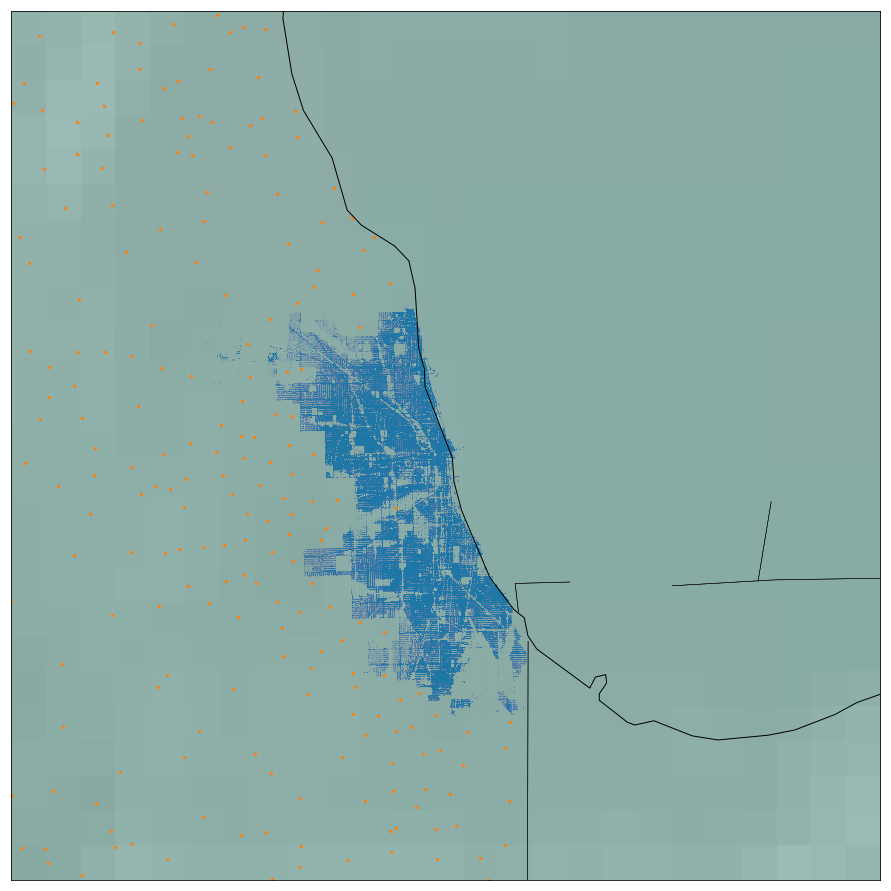

In [154]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=41.895140898, lon_0=-87.624255632,
            width=9E4, height=9E4)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='black')

lon = x.tolist()
lat = y.tolist()

m.scatter(lon, lat, latlon=True, s=0.1,
          cmap=cm.hot, marker="o", alpha=0.005)

cities_lat = IL_cities['lat'].tolist()
cities_long = IL_cities['lng'].tolist()
cities_name = IL_cities['city_ascii'].tolist()
#for lat, long, name in zip(cities_lat, cities_long,cities_name):
#    m.text(long, lat, name)
#for label, xpt, ypt in zip(cities_name,cities_long, cities_lat):
#    plt.text(xpt, ypt, label, fontsize = 7)
m.scatter(cities_long, cities_lat, latlon=True, s= 5, marker="o",cmap=cm.cool)
plt.show()

In [155]:
crime['Beat'].head()

0     831
1    1231
2     825
3    1932
4    2332
Name: Beat, dtype: int64

In [156]:
crime_type_counts = crime['Primary Type'].value_counts()
crime_type_counts

THEFT                                1439300
BATTERY                              1248292
CRIMINAL DAMAGE                       780015
NARCOTICS                             716044
ASSAULT                               425168
OTHER OFFENSE                         424663
BURGLARY                              391519
MOTOR VEHICLE THEFT                   317528
DECEPTIVE PRACTICE                    269615
ROBBERY                               258515
CRIMINAL TRESPASS                     195678
WEAPONS VIOLATION                      72568
PROSTITUTION                           68549
PUBLIC PEACE VIOLATION                 48274
OFFENSE INVOLVING CHILDREN             46227
CRIM SEXUAL ASSAULT                    27802
SEX OFFENSE                            25563
INTERFERENCE WITH PUBLIC OFFICER       15584
GAMBLING                               14437
LIQUOR LAW VIOLATION                   14125
ARSON                                  11275
HOMICIDE                                9579
KIDNAPPING

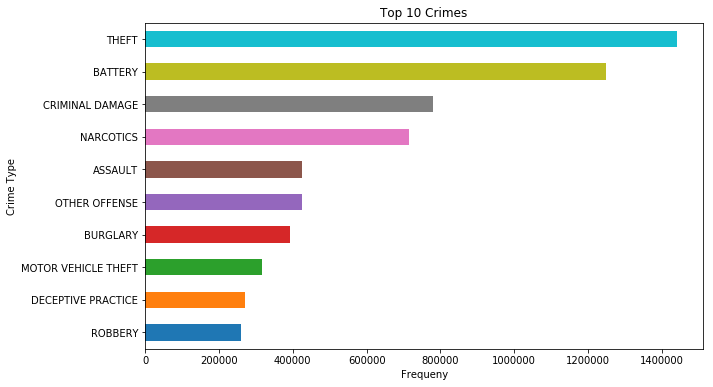

In [176]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.set_title('Top 10 Crimes')
ax.set_ylabel('Crime Type')
ax.set_xlabel('Frequeny')
crime_type_counts[:10].sort_values(ascending = True).plot.barh(ax=ax)

In [158]:
location_desc_counts = crime['Location Description'].value_counts()

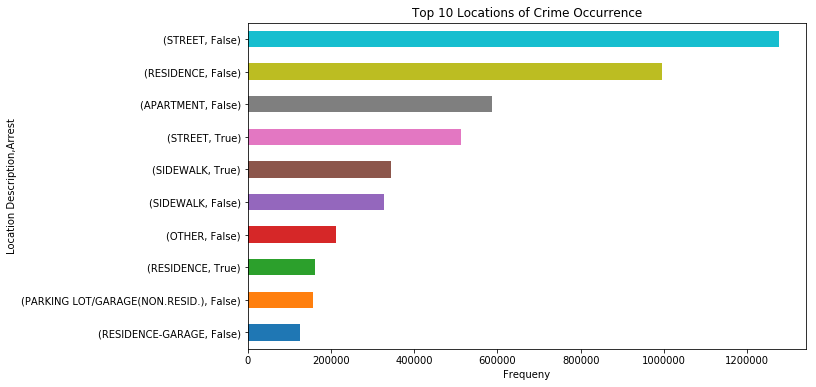

In [177]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.set_title('Top 10 Locations of Crime Occurrence')
ax.set_ylabel('Location Description')
ax.set_xlabel('Frequeny')
location_desc_counts[:10].sort_values(ascending = True).plot.barh(ax=ax)


In [169]:
location_count = crime.groupby(['Location Description'])['Primary Type'].size().sort_values(ascending=False).to_frame()
location_count.rename(columns={'Primary Type':'Total Count'}, inplace=True)
location_count.reset_index(inplace=True)
top_location = location_count.head(20)['Location Description'].tolist()

In [170]:
location_desc_counts = crime.groupby(['Location Description'])['Arrest'].value_counts().sort_values(ascending=False)
location_desc_counts[:30]

Location Description            Arrest
STREET                          False     1277373
RESIDENCE                       False      995419
APARTMENT                       False      586578
STREET                          True       512151
SIDEWALK                        True       344574
                                False      326614
OTHER                           False      211616
RESIDENCE                       True       162584
PARKING LOT/GARAGE(NON.RESID.)  False      157604
RESIDENCE-GARAGE                False      124968
APARTMENT                       True       123488
SCHOOL, PUBLIC, BUILDING        False       99860
SMALL RETAIL STORE              False       88291
RESTAURANT                      False       85521
RESIDENCE PORCH/HALLWAY         False       82338
ALLEY                           False       82187
VEHICLE NON-COMMERCIAL          False       75819
ALLEY                           True        70121
RESIDENTIAL YARD (FRONT/BACK)   False       56300
DEPARTMENT 

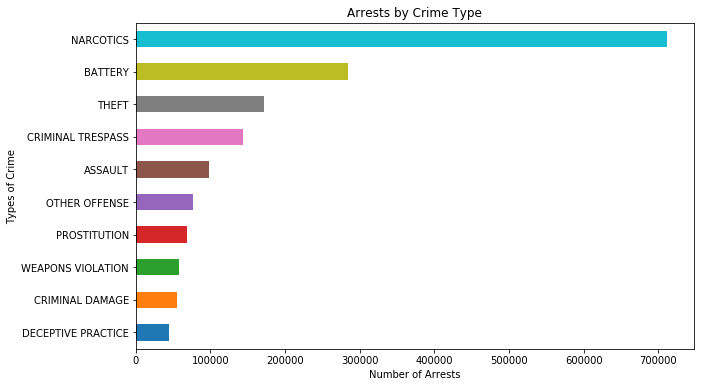

In [178]:
fig = plt.figure(figsize=(10,6))
arrest_type = crime[crime['Arrest'] == True]['Primary Type'].value_counts().nlargest(10).sort_values(ascending = True).plot(kind = 'barh', title = 'Arrests by Crime Type')
arrest_type.set_xlabel("Number of Arrests")
arrest_type.set_ylabel("Types of Crime")
plt.show()

Text(0.5,1,'Number of Crime by Location Description and Arrest')

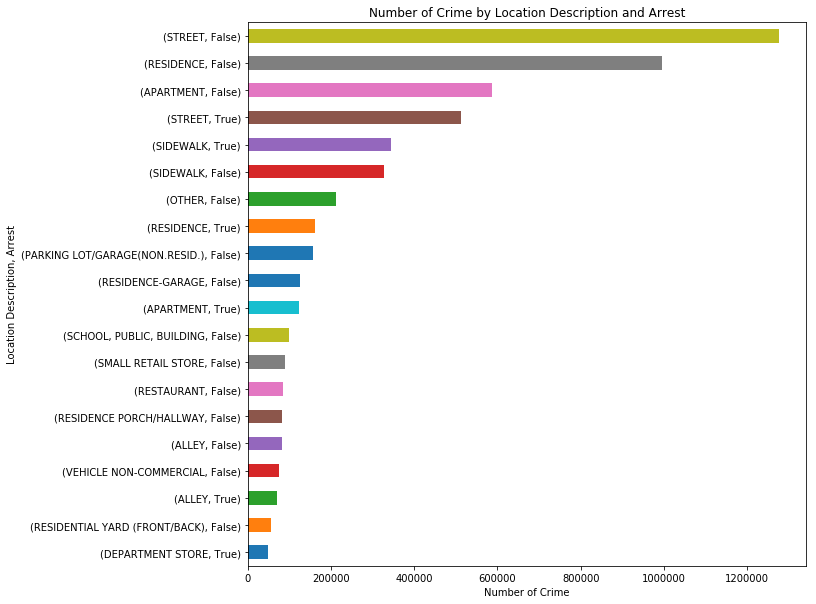

In [181]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
location_desc_counts[:20].sort_values(ascending = True).plot.barh(y='Arrest',ax=ax)
ax.set_ylabel("Location Description, Arrest")
ax.set_xlabel("Number of Crime")
ax.set_title("Number of Crime by Location Description and Arrest")

In [ ]:
location_arrest = crime.groupby(['Location Description', 'Arrest'])['Primary Type'].size().sort_values(ascending=False).to_frame()
location_arrest.reset_index(inplace=True)

In [ ]:
location_arrest.rename(columns={'Location Description':'Location', 'Primary Type':'Count'}, inplace=True)
top_location_arrest = location_arrest[location_arrest.Location.isin(top_location)]
#top_location_arrest=top_location_arrest.sort_values(by=['Location'])
top_location_arrest.reset_index(drop=True, inplace=True)
top_location_arrest

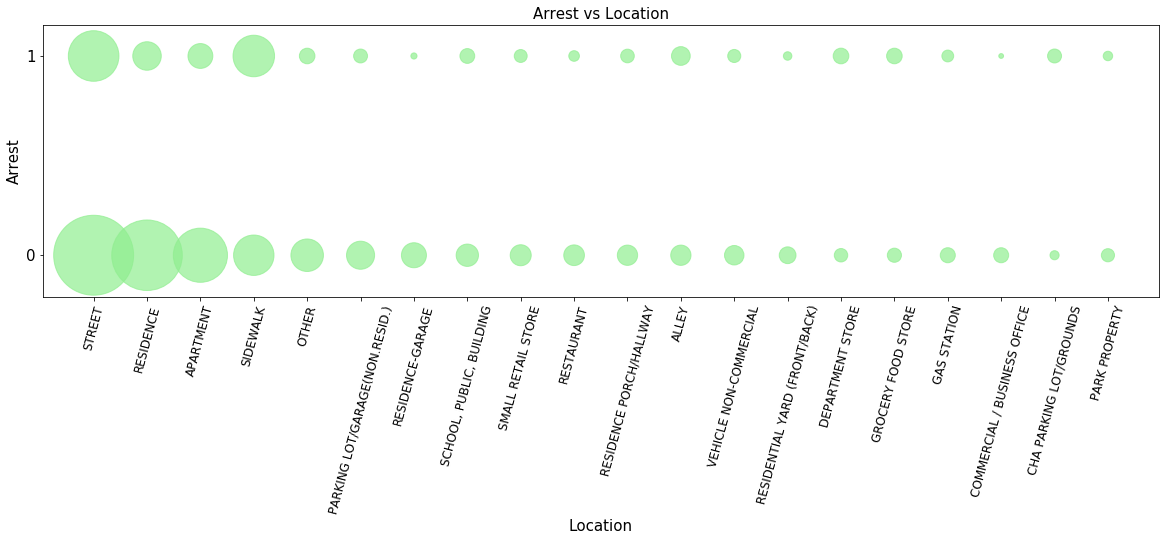

In [150]:
plt.figure(figsize=(20, 5))
plt.scatter(top_location_arrest['Location'], top_location_arrest['Arrest'], s=top_location_arrest['Count']*0.005, alpha = 0.7, color = 'lightgreen')
plt.yticks(top_location_arrest['Arrest'].unique().tolist(), fontsize = 15)
plt.xticks(rotation = 75, fontsize = 12)
plt.title('Arrest vs Location', fontsize = 15)
plt.xlabel('Location', fontsize = 15)
plt.ylabel('Arrest', fontsize = 15)
plt.show()

In [31]:
type_arrest = crime.groupby(['Primary Type', 'Arrest'])['ID'].size().sort_values(ascending=False).to_frame()
type_arrest.reset_index(inplace=True)
type_arrest.rename(columns={'ID':'Arrest Count', 'Primary Type':'Type'},inplace = True)
type_arrest_true = type_arrest.loc[type_arrest['Arrest'] == True]
type_arrest_true.head(30)


,Type,Arrest,Arrest Count
3,NARCOTICS,True,711834
8,BATTERY,True,284185
11,THEFT,True,171654
12,CRIMINAL TRESPASS,True,142952
13,ASSAULT,True,97987
14,OTHER OFFENSE,True,75990
15,PROSTITUTION,True,68282
16,WEAPONS VIOLATION,True,57531
17,CRIMINAL DAMAGE,True,54965
19,DECEPTIVE PRACTICE,True,44431


In [32]:
crime_type = crime.groupby(['Primary Type'])['ID'].size().to_frame()
crime_type.reset_index(inplace=True)
crime_type.rename(columns={'ID':'Total'}, inplace = True)
crime_type

,Primary Type,Total
0,ARSON,11275
1,ASSAULT,425168
2,BATTERY,1248292
3,BURGLARY,391519
4,CONCEALED CARRY LICENSE VIOLATION,336
5,CRIM SEXUAL ASSAULT,27802
6,CRIMINAL DAMAGE,780015
7,CRIMINAL TRESPASS,195678
8,DECEPTIVE PRACTICE,269615
9,DOMESTIC VIOLENCE,1


In [33]:
type_arrest_total = type_arrest_true.merge(crime_type, left_on='Type', right_on='Primary Type',suffixes=('_left', '_right'))
type_arrest_total['Arrest Percentage'] = type_arrest_total['Arrest Count'] / type_arrest_total['Total'] *100
type_arrest_total.sort_values(by = ['Total'], ascending = False, inplace = True)
type_arrest_total.reset_index(inplace=True, drop = True)
type_arrest_total

,Type,Arrest,Arrest Count,Primary Type,Total,Arrest Percentage
0,THEFT,True,171654,THEFT,1439300,11.926214
1,BATTERY,True,284185,BATTERY,1248292,22.765907
2,CRIMINAL DAMAGE,True,54965,CRIMINAL DAMAGE,780015,7.046659
3,NARCOTICS,True,711834,NARCOTICS,716044,99.412047
4,ASSAULT,True,97987,ASSAULT,425168,23.046654
5,OTHER OFFENSE,True,75990,OTHER OFFENSE,424663,17.894189
6,BURGLARY,True,22462,BURGLARY,391519,5.737142
7,MOTOR VEHICLE THEFT,True,28860,MOTOR VEHICLE THEFT,317528,9.088962
8,DECEPTIVE PRACTICE,True,44431,DECEPTIVE PRACTICE,269615,16.479424
9,ROBBERY,True,25076,ROBBERY,258515,9.700017


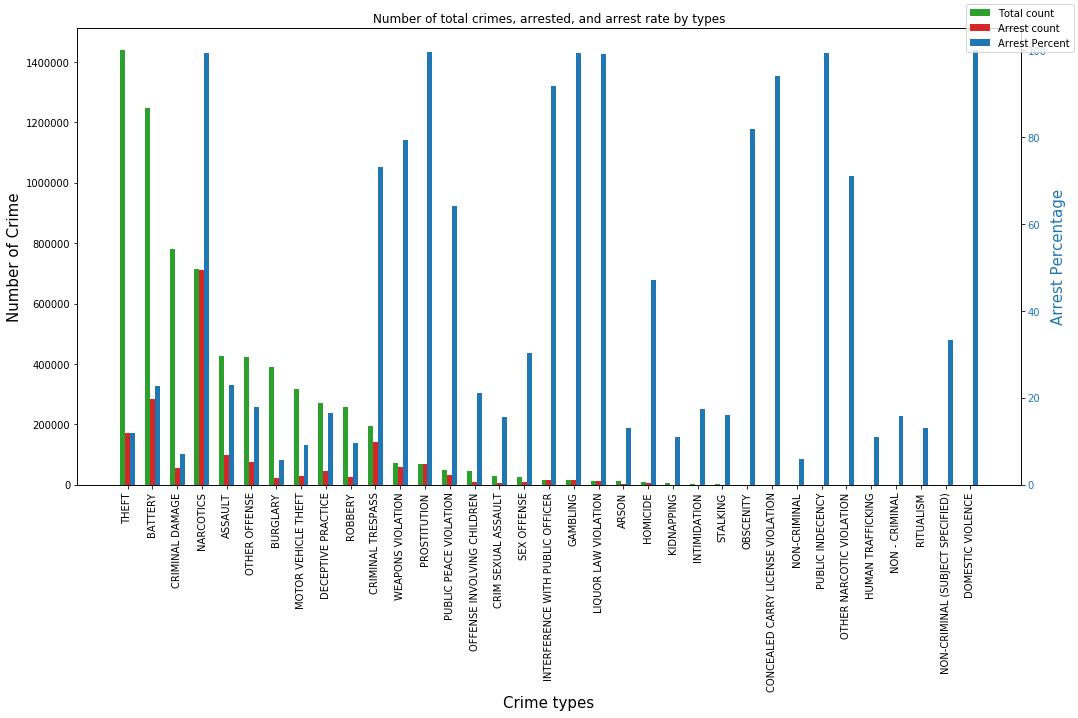

In [149]:
import numpy as np
ind = np.arange(type_arrest_total.shape[0])
width = 0.2

fig, ax1 = plt.subplots(figsize=(15,10))
plt.title('Number of total crimes, arrested, and arrest rate by types')
color = 'tab:green'
ax1.set_xlabel('Crime types', fontsize = 15)
ax1.set_ylabel('Number of Crime', fontsize = 15)

ax1.bar(ind-width, type_arrest_total['Total'], color=color, label='Total count', width = .2)
ax1.bar(ind, type_arrest_total['Arrest Count'], color='tab:red', label='Arrest count', width = .2)
ax1.set_xticklabels(type_arrest_total['Type'].unique().tolist())
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Arrest Percentage', color=color, fontsize = 15)
ax2.bar(ind+width, type_arrest_total['Arrest Percentage'], color=color, label = 'Arrest Percent',width=.2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(ind)
ax2.set_xticklabels(type_arrest_total['Type'].unique().tolist())

fig.tight_layout()

fig.legend()
plt.show()


In [182]:
crime['Date'] = pd.to_datetime(crime['Date'], format='%m/%d/%Y %I:%M:%S %p')

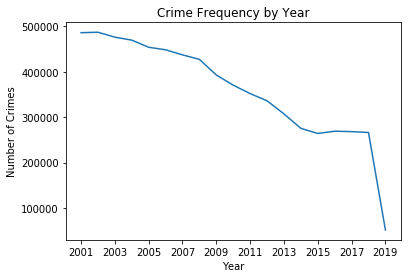

In [183]:
crime.groupby(pd.DatetimeIndex(crime['Date']).year).size().plot(kind='line')
plt.xticks(np.arange(2001, 2020, 2.0))
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.title('Crime Frequency by Year')
plt.show()

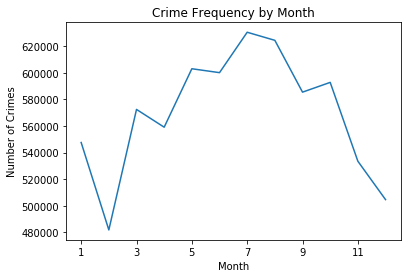

In [184]:
crime.groupby(pd.DatetimeIndex(crime['Date']).month).size().plot(kind='line')
plt.xticks(np.arange(1, 13, 2))
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.title('Crime Frequency by Month')
plt.show()

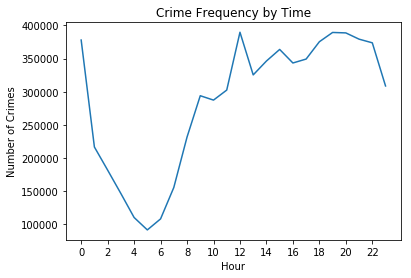

In [185]:
crime.groupby(pd.DatetimeIndex(crime['Date']).hour).size().plot(kind='line')
plt.xticks(np.arange(0, 23, 2))
plt.ylabel('Number of Crimes')
plt.xlabel('Hour')
plt.title('Crime Frequency by Time')
plt.show()

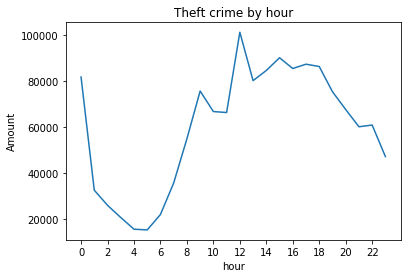

In [186]:
theft_data = crime[crime['Primary Type'] == 'THEFT']
theft_data.groupby(pd.DatetimeIndex(theft_data['Date']).hour).size().plot(kind='line')
plt.xticks(np.arange(0, 23, 2))
plt.title("Theft crime by hour")
plt.xlabel("hour")
plt.ylabel("Amount")
plt.show()

In [187]:
crime_new = crime[(crime['X Coordinate'] != 0) & (crime['Y Coordinate'] != 0)]
crime_new.dropna()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,2003-05-20 20:00:00,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,2003-05-24 21:25:00,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,2003-05-24 13:10:00,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,2003-05-24 14:00:00,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,2003-05-25 02:22:00,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"
5,2746420,HJ379328,2003-05-16 08:00:00,033XX W NORTH AVE,0560,ASSAULT,SIMPLE,OTHER,True,False,...,26.0,23.0,08A,1153968.0,1910439.0,2003,02/28/2018 03:56:25 PM,41.910078,-87.709819,"(41.910077533, -87.709818663)"
6,2746421,HJ377410,2003-05-15 13:30:00,020XX W ADAMS ST,0850,THEFT,ATTEMPT THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,...,2.0,28.0,06,1162662.0,1899079.0,2003,02/28/2018 03:56:25 PM,41.878727,-87.678199,"(41.878726928, -87.678199026)"
7,2746422,HJ385416,2003-05-25 02:01:35,047XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,3.0,38.0,08B,1177954.0,1873682.0,2003,02/28/2018 03:56:25 PM,41.808702,-87.622822,"(41.8087017, -87.622821809)"
8,2746423,HJ384132,2003-05-24 12:40:00,027XX N HERMITAGE AVE,0630,BURGLARY,ATTEMPT FORCIBLE ENTRY,RESIDENCE-GARAGE,True,False,...,32.0,7.0,05,1164190.0,1918307.0,2003,02/28/2018 03:56:25 PM,41.931458,-87.672044,"(41.931457779, -87.672044256)"
9,2746424,HJ383802,2003-05-23 23:00:00,063XX W 59TH ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,23.0,56.0,05,1135285.0,1864749.0,2003,02/28/2018 03:56:25 PM,41.785049,-87.779536,"(41.785049371, -87.779535891)"


In [188]:
crime.dropna()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,2003-05-20 20:00:00,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,2003-05-24 21:25:00,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,2003-05-24 13:10:00,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,2003-05-24 14:00:00,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,2003-05-25 02:22:00,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"
5,2746420,HJ379328,2003-05-16 08:00:00,033XX W NORTH AVE,0560,ASSAULT,SIMPLE,OTHER,True,False,...,26.0,23.0,08A,1153968.0,1910439.0,2003,02/28/2018 03:56:25 PM,41.910078,-87.709819,"(41.910077533, -87.709818663)"
6,2746421,HJ377410,2003-05-15 13:30:00,020XX W ADAMS ST,0850,THEFT,ATTEMPT THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,...,2.0,28.0,06,1162662.0,1899079.0,2003,02/28/2018 03:56:25 PM,41.878727,-87.678199,"(41.878726928, -87.678199026)"
7,2746422,HJ385416,2003-05-25 02:01:35,047XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,3.0,38.0,08B,1177954.0,1873682.0,2003,02/28/2018 03:56:25 PM,41.808702,-87.622822,"(41.8087017, -87.622821809)"
8,2746423,HJ384132,2003-05-24 12:40:00,027XX N HERMITAGE AVE,0630,BURGLARY,ATTEMPT FORCIBLE ENTRY,RESIDENCE-GARAGE,True,False,...,32.0,7.0,05,1164190.0,1918307.0,2003,02/28/2018 03:56:25 PM,41.931458,-87.672044,"(41.931457779, -87.672044256)"
9,2746424,HJ383802,2003-05-23 23:00:00,063XX W 59TH ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,23.0,56.0,05,1135285.0,1864749.0,2003,02/28/2018 03:56:25 PM,41.785049,-87.779536,"(41.785049371, -87.779535891)"


In [3]:
from sklearn.preprocessing import LabelEncoder
ctle = LabelEncoder()
crime_type_labels = ctle.fit_transform(crime['Primary Type'])
crime_type_mappings = {index: label for index, label in 
                  enumerate(ctle.classes_)}
crime['PrimaryTypeLabel'] = crime_type_labels

In [4]:
crime.dropna(inplace=True)
ldle = LabelEncoder()
crime_location_labels = ldle.fit_transform(crime['Location Description'])
crime_location_mappings = {index: label for index, label in 
                  enumerate(ldle.classes_)}
crime['LocationDescriptionLabel'] = crime_location_labels

In [4]:
fble = LabelEncoder()
crime_fbi_labels = fble.fit_transform(crime['FBI Code'])
crime_fbi_mappings = {index: label for index, label in 
                  enumerate(fble.classes_)}
crime['FBICodeLabel'] = crime_fbi_labels

In [ ]:
#takes very long to run
'''
import pandas as pd
from sklearn.svm import LinearSVC

'''X = crime[['IUCR', 'Primary Type',
       'Description', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code']]'''

X = crime[['Domestic','PrimaryTypeLabel','LocationDescriptionLabel','FBICodeLabel']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
svc = LinearSVC()
svc_fit = svc.fit(X_train, y_train)

svc_score = svc_fit.score(X_test, y_test)
print(svc_score)
'''

In [ ]:
#takes long to run
'''
import pandas as pd
from sklearn.svm import LinearSVC

'''X = crime[['IUCR', 'Primary Type',
       'Description', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code']]'''

X = crime[['Domestic']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
svc = LinearSVC()
svc_fit = svc.fit(X_train, y_train)

svc_score = svc_fit.score(X_test, y_test)
print(svc_score)
'''


In [12]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

crime = crime.dropna()
X = crime[['PrimaryTypeLabel','Domestic','Year', 'Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(max_depth=10)
dtc_fit = dtc.fit(X_train, y_train)

dtc_score = dtc_fit.score(X_test, y_test)
cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)
print(dtc_score)
print(cvs)'''

0.8755141845985588
[0.87509482 0.87454312 0.8755654  0.87549644 0.87320795]


In [4]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

crime = crime.dropna()
X = crime[['Domestic','Year', 'Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(max_depth=10)
dtc_fit = dtc.fit(X_train, y_train)

dtc_score = dtc_fit.score(X_test, y_test)
cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)
print(dtc_score)
print(cvs)'''

0.7537942158187928
[0.75355364 0.75340354 0.75353135 0.75442788 0.75363277]


In [5]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

crime = crime.dropna()
X = crime[['Domestic','Year', 'Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel','PrimaryTypeLabel']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(max_depth=10)
dtc_fit = dtc.fit(X_train, y_train)

dtc_score = dtc_fit.score(X_test, y_test)
cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)
print(dtc_score)
print(cvs)'''

0.8759255322774058
[0.87549694 0.87558568 0.87533011 0.8751714  0.87483875]


In [11]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

crime = crime.dropna()
X = crime[['Domestic','Year', 'District', 'Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel','PrimaryTypeLabel']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(max_depth=10)
dtc_fit = dtc.fit(X_train, y_train)

dtc_score = dtc_fit.score(X_test, y_test)
cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)
print(dtc_score)
print(cvs)'''

0.8753981634583712
[0.87524137 0.87425104 0.87465265 0.87458317 0.87504158]


In [10]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

crime = crime.dropna()
X = crime[['Domestic','Year', 'District', 'Beat', 'Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel','PrimaryTypeLabel']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(max_depth=10)
dtc_fit = dtc.fit(X_train, y_train)

dtc_score = dtc_fit.score(X_test, y_test)
cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)
print(dtc_score)
print(cvs)'''

0.8755117505886247
[0.87520436 0.8748352  0.87602786 0.87472567 0.87551621]


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

crime = crime.dropna()
X = crime[['Domestic','Year', 'FBICodeLabel','Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel','PrimaryTypeLabel']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(max_depth=10)
dtc_fit = dtc.fit(X_train, y_train)

dtc_score = dtc_fit.score(X_test, y_test)
cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)
print(dtc_score)
print(cvs)

0.8766752073370796
[0.87559024 0.87604003 0.87679863 0.8766886  0.87492799]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = crime[['Domestic','Year', 'Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','FBICodeLabel','LocationDescriptionLabel','PrimaryTypeLabel']]
y = crime['Arrest']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rfc=RandomForestClassifier(n_estimators=100)
rfc_fit = rfc.fit(X_train, y_train)

rfc_score = rfc_fit.score(X_test, y_test)
print(rfc_score)
'''cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)

print(cvs)'''

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

crime = crime.dropna()
X = crime[['Domestic','Year','Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel','Arrest']]
y = crime['PrimaryTypeLabel']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(max_depth=10)
dtc_fit = dtc.fit(X_train, y_train)

dtc_score = dtc_fit.score(X_test, y_test)
cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)
print(dtc_score)
print(cvs)

0.4263119719212614
[0.4256757  0.42587034 0.42641791 0.42485537 0.42670816]


In [7]:
#Create a Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

crime = crime.dropna()
X = crime[['Domestic','Year', 'Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel','Arrest']]
y = crime['PrimaryTypeLabel']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

nbc = GaussianNB()
nbc_fit = nbc.fit(X_train, y_train)

nbc_score = nbc_fit.score(X_test, y_test)
cvs = cross_val_score(nbc_fit, X_test, y_test, cv = 5)
print(nbc_score)
print('cross validation score', cvs)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.29113598488966635
cross validation score [0.29259982 0.2909113  0.29274338 0.29364825 0.29106709]


In [ ]:
from sklearn.ensemble import RandomForestClassifier


X = crime[['Domestic','Year', 'Community Area', 'Ward', 'X Coordinate', 'Y Coordinate','LocationDescriptionLabel','Arrest']]
y = crime['PrimaryTypeLabel']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rfc=RandomForestClassifier(n_estimators=50)
rfc_fit = rfc.fit(X_train, y_train)

rfc_score = rfc_fit.score(X_test, y_test)
print(rfc_score)
cvs = cross_val_score(dtc_fit, X_test, y_test, cv = 5)

print(cvs)